<a href="https://colab.research.google.com/github/HSYhrae/TIL/blob/master/Linear_Regression(insurance_charges).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 한글폰트 적용

In [1]:
!pip install lightgbm==3.3.2
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.0.0
    Uninstalling lightgbm-4.0.0:
      Successfully uninstalled lightgbm-4.0.0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,550 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline

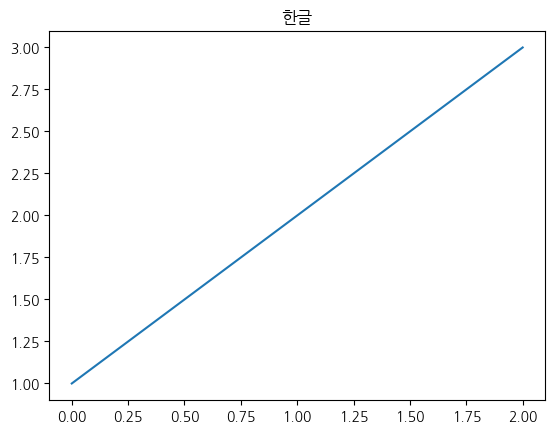

In [1]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

## 선형 회귀
- 최신 알고리즘에 비해 예측력은 다소 떨어지지만 쉽고 빠르게 예측할 수 있어 많이 사용된다.

### 문제 정의
- 개인별 적정 보험료 책정하기

### 데이터 불러오기 및 라이브러리 호출

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/Basic_ML/Linear_Regression/insurance.csv'
Data = pd.read_csv(DATA_PATH)

### 데이터 확인

In [13]:
Data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
Data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### 데이터 전처리

- 머신러닝을 수행하기 위해 범주형 데이터를 수치형 데이터로 변경
- 성별: 0(여자), 1(남자)
- 흡연여부: 0(비흡연자), 1(흡연자)
- 지역: 0(남서), 1(남동), 2(북서), 3(북동)

In [20]:
Data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [21]:
Data['sex'] = Data['sex'].apply(lambda x: 0 if x == 'female' else 1)
Data['smoker'] = Data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
Data['region'] = Data['region'].map(region_mapping)

In [22]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


- 학습 데이터와 시험 데이터로 나누기

In [41]:
X = Data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']] # 독립변수
y = Data['charges']                                             # 종속변수

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

### 모델링

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 모델 활용 예측하기

In [28]:
pred = model.predict(X_test) # 해당 괄호안에는 목표변수(종속변수)가 포함되어서는 안 된다.

### 예측 모델 평가하기

- 데이터 프레임 활용
- 모든 데이터를 살펴보는 것은 힘들다.

In [34]:
df = pd.DataFrame({'실제': y_test, '예측': pred})
df

,실제,예측
12,1826.84300,4243.315613
306,20177.67113,4369.130655
318,7421.19455,8459.055910
815,1877.92940,2915.207396
157,15518.18025,24708.665557
...,...,...
713,1984.45330,6480.133546
1282,14283.45940,23610.114962
531,14043.47670,14857.574372
537,8825.08600,9955.079471


- 그래프 활용
- 3범주로 나눌수 있다.
    1. 예측값과 실제값이 유사하다. 예측이 잘 되었다.
    2. 예측값이 실제값보다 더 크다.
    3. 실제값이 예측값보다 더 크다.
- 다만 그래프의 경우 객관적인 기준이 되지 못한다.

<Axes: xlabel='실제', ylabel='예측'>

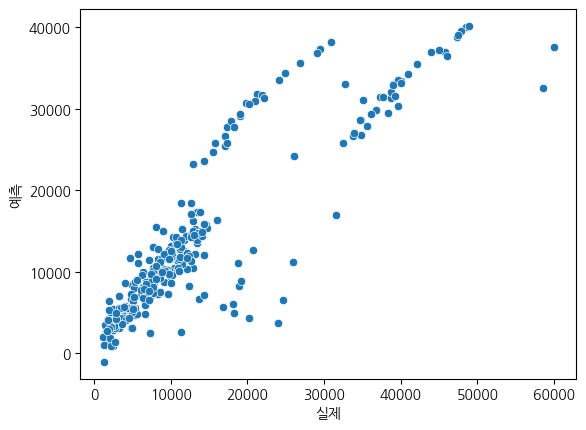

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.scatterplot(x = '실제', y = '예측', data = df)

- 통계적 방법 활용(RMSE)
- 값이 작을수록 예측력이 높다고 평가할 수 있다.
- 도출된 값이 작은지 큰지를 평가할 수 있는 객관적인 기준은 없다.
- 데이터 특성에 따라 많이 달라진다. 따라서 상대 평가에 사용된다.
- 같은 데이터에 여러 모델링을 해보고 가장 낮은 값을 가지는 모델을 선택한다.

In [39]:
from sklearn.metrics import mean_squared_error
print('방법1:', mean_squared_error(y_test, pred) ** 0.5)
print('방법2:', mean_squared_error(y_test, pred, squared = False))

방법1: 5680.127559028503
방법2: 5680.127559028503


$$R^2$$
- 결정계수: 독립변수가 종속변수를 얼마만큼 설명해주는지를 가리키는 지표
- 0~1 사이의 값을 가지며 1에 가까울수록 좋은 지표이다.
- 도출된 값은 대략 0.74로 일반적으로 0.7~0.8 이상이면 괜찮은 수치라고 볼 수 있다.

In [40]:
model.score(X_train, y_train)

0.7380305957382403

### 더 알아보기

- 각각 독립변수의 선형회귀계수를 알아보기

In [42]:
model.coef_

array([2.64023906e+02, 1.34329927e+01, 3.08710555e+02, 4.74615667e+02,
       2.34783078e+04, 3.85005527e+02])

- 해석
    + age가 1 증가하면 charges는 약 264만큼 증가한다.
    + sex의 경우 범주형 데이터이므로'남자(1)가 여자(0)보다 charges가 보통 13정도 높다'라고 해석.

In [43]:
pd.Series(model.coef_, index = X.columns)

age           264.023906
sex            13.432993
bmi           308.710555
children      474.615667
smoker      23478.307766
region        385.005527
dtype: float64

- 여러 계수를 비교할 때 단순 절대값의 크기로만 비교하는 것은 부적절하다.
- 수치형 데이터의 1이 증가할 때와 범주형 데이터의 1이 증가할 때의 영향력은 다르다.
- 즉, 40 -> 41과 0,1만 있는 데이터에서 1이 증가하는 것의 영향력을 비교하는 것은 알맞지 않다.
- 이를 보완하기 위해서는 스케일링 작업이 필요하다.